# Sequenze di numeri difficilmente prevedibili
## La mappa logistica

Gli algoritmi numerici sono necessariamente deterministici. Tuttavia, è possibile scrivere algoritmi che generano sequenze di numeri per i quali è difficilmente prevedibile il valore successivo in una sequenza dati i precedenti. Questo avviene quando le sequenze dipendono da un valore inziale $x_0$ rispetto al quale i valori successivi sono fortemente dipendenti.

Spesso siamo abituati a conoscere sequenze che hanno andamenti regolari. Di seguito sarà presentato un esempio, senza darne una trattazione rigorosa, in cui un parametro $r$ regola il passaggio da un andamento regolare ad un andamento via via più complesso, fino a diventare in pratica imprevedibile

L'esempio è dato la cosiddetta *mappa logistica* in cui, partendo da un numero iniziale $x_0$, i valori successivi si ottengono come:

$x_{n+1} = r x_n (1-x_n)$

Dove $r$ è un parametro che viene fatto variare da 0 a 4.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def logistic(x, r):
    return r*x*(1-x)

In [17]:
def plot_logisic_sequence(x0, r, nn = 100):
    x = x0
    px = []
    py = []
    for n in range(nn):
        x = logistic(x,r)
        px.append(n)
        py.append(x)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(px, py)
    print("x(",n,")=",x)

Per valori piccoli di $r$ la sequenza converge ad un valore fisso. Per $r<1$ la sequenza in particolare converge a zero

x( 99 )= 0.00024540191154079794


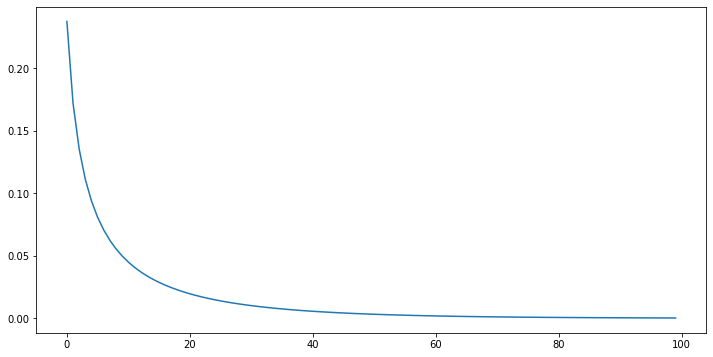

In [18]:
plot_logisic_sequence(0.5,0.95)

Per $r=2.2$, ad esempio, si verifica numericamente che il valore è 0.545454...

x( 99 )= 0.5454545454545454


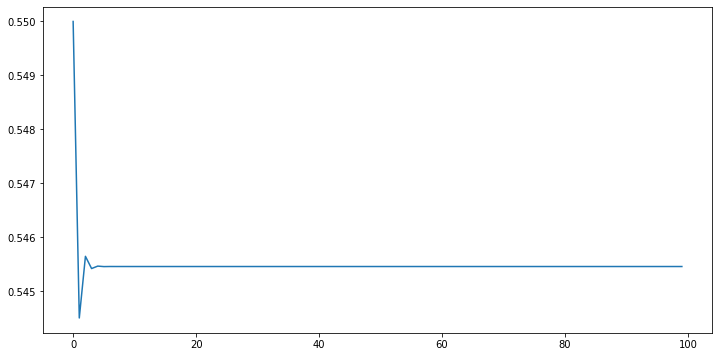

In [19]:
plot_logisic_sequence(0.5,2.2)

Per $r=3.2$ la sequenza oscilla tra due valori.

x( 99 )= 0.5130445095326298


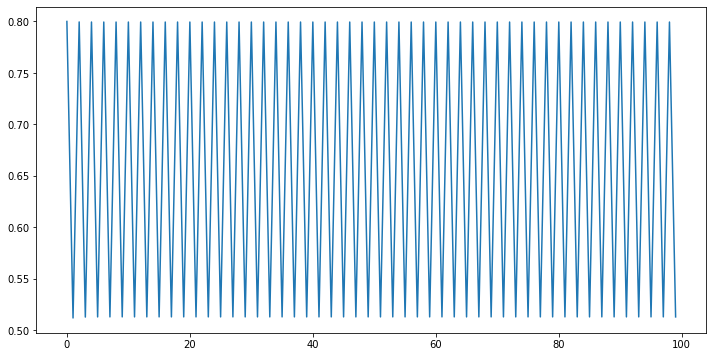

In [20]:
plot_logisic_sequence(0.5,3.2)

Per $r=3.55$ la sequenza oscilla tra quattro valori.

x( 99 )= 0.5404748801197887


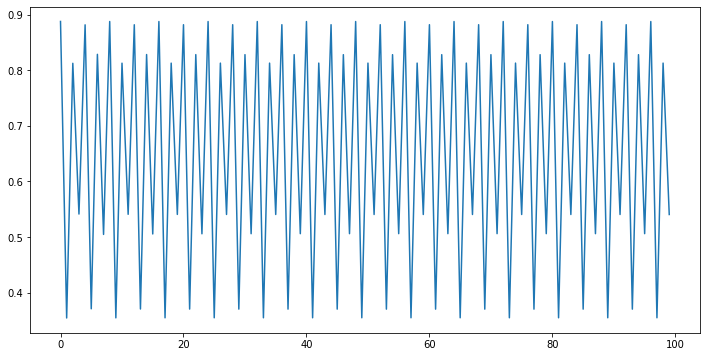

In [21]:
plot_logisic_sequence(0.5,3.55)

Per $r=3.9999$ il comportamento è molto irregolare.

x( 399 )= 0.9398114011376103


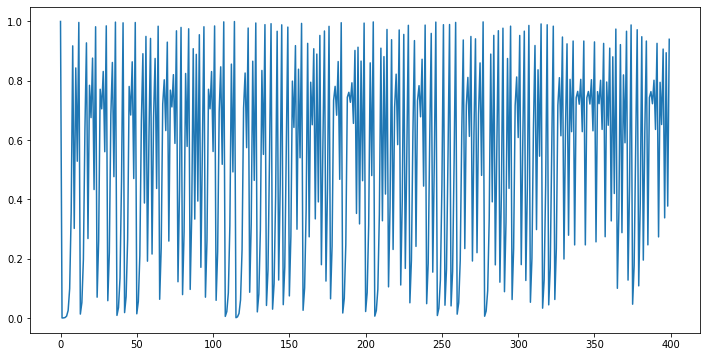

In [22]:
plot_logisic_sequence(0.5,3.9999,400)

Al variare di $r$ la sequenza cambia comportamento:
* inizialmente converge verso un valore fissi;
* poi oscilla tra due valori, quindi 4, 8, 16, ecc.;
* per alcuni valori di $r$ non ha più un andamento regolare e i valori sono difficilmente prevedibili.

In [23]:
def plot_logistic_map(r1=1, r2=3.99999, nsteps=1000, discard=200, points=200, x0=0.5):
    step = (r2-r1)/nsteps
    px = []
    py = []
    for r in np.arange(r1,r2,step):
        x = x0
        for i in range(points+discard):
            x = logistic(x,r)
            if i > discard:
                px.append(r)
                py.append(x)
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(px, py, marker=",", markersize=1, linestyle='')

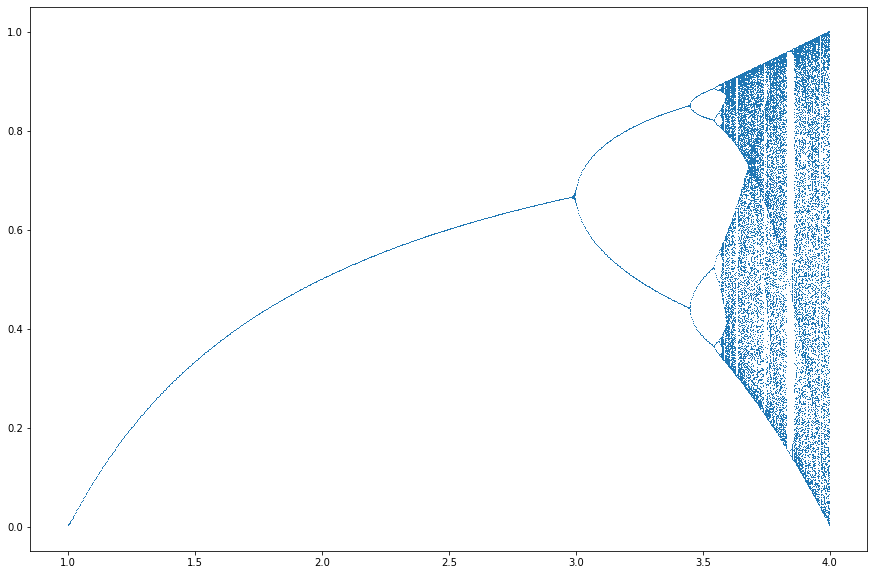

In [24]:
plot_logistic_map()

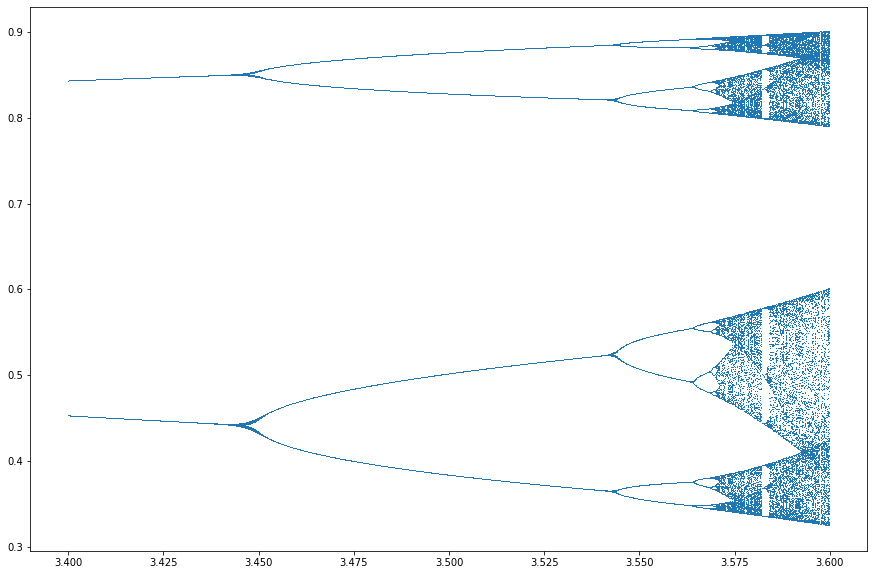

In [12]:
plot_logistic_map(3.4,3.6)

Per $r=4.0$, la sequenza copre l'intervallo $[0,1]$ *densamente*.

Non tratteremo qui i dettagli matematici di questa sequenza, rimandando eventualmente ad altri corsi gli approfondimenti.

Si può dimostrare (ma non lo faremo) che la *densità* $\rho(x)$, dei valori $x_i$ che poi sarà legata a quella che chiameremo distribuzione di probabilità, è uguale a:

$\displaystyle\rho(x)= \frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}x} = f(x) = \frac{C}{\sqrt{x(1-x)}}\,,$

dove $C=1/\pi$ è il coefficiente di normalizzazione definito in modo tale che:

$\displaystyle\int_0^1 f(x)\,\mathrm{d}x = 1\,.$

Perché deve essere:

$\displaystyle\int_0^1 \frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}x}\,\mathrm{d}x = \frac{N}{N}= 1$

In [26]:
seq=[]
r=4
x = 0.34567
for i in range(100000):
    seq.append(x)
    x=logistic(x, r)

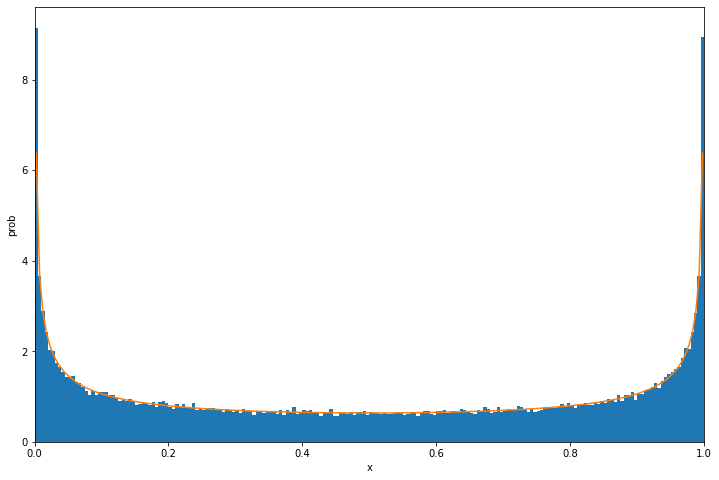

In [27]:
nbins=200
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(seq, nbins, density=True)
delta=1/nbins
x = np.arange(0+delta/2,1+delta/2,delta)
y = c = np.divide(1.,np.sqrt(x*(1-x)),out=np.zeros_like(x), where=((x!=0)&(x!=1)))
y/=math.pi
plt.plot(x, y)
plt.xlim(0, 1)
plt.xlabel('x')
plt.ylabel('prob')
plt.show()

Abbiamo già cominciato a vedere una panticipazione di alcuni concetti che saranno meglio definiti ed approfonditi in seguiti:
* distribuzione di probabilità continua
* passaggio all'infinito di una distribuzione discreta ad una densità di probabilità continua
* fluttuazioni statistiche e smorzamento di queste per grandi numeri

Proviamo ad applicare la seguente trasformazione:
    
$\displaystyle x \mapsto y = \int_0 ^x f(\xi)\,\mathrm{d} \xi = 1-\frac{2}{\pi}\sin^{-1}\sqrt{1-x}$

In questo modo se prima avevo una densità di punti per unità di $x$:

$\rho(x)=\displaystyle \frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}x} = f(x)$

ora avrò:

$\rho(y) = \displaystyle \frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}y} = \frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}x} \frac{\mathrm{d}x}{\mathrm{d}y} = f(x) \frac{\mathrm{d}x}{\mathrm{d}y}$

Ma:

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}y} = \left(\frac{\mathrm{d}y}{\mathrm{d}x}\right)^{-1} = \frac{1}{f(x)}$

quindi:

$\displaystyle \rho(y) = \frac{f(x)}{f(x)}=1$




In [28]:
seq1 = [1-2/math.pi*np.arcsin(np.sqrt(1-seq[i])) for i in range(len(seq))]

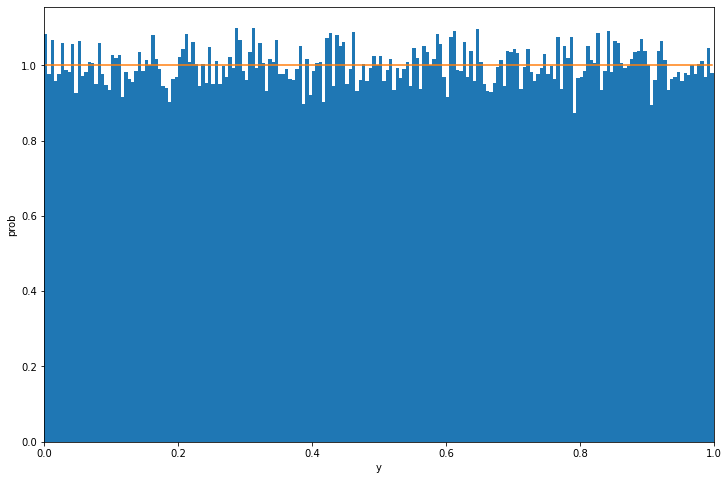

In [29]:
nbins=200
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(seq1, nbins, density=True)
plt.plot(x, np.ones(len(x)))
plt.xlim(0, 1)
plt.xlabel('y')
plt.ylabel('prob')
plt.show()

La densità di questi valori appare uniforme, mostrando comunque delle **fluttuazioni** che si possono ridurre aumentando il numero di valori della sequenza.

## Si tratta di un fenomeno casuale?

In realtà, la sequenza è deterministica, non casuale, ed è riproducibile se si conosce il valore inziale $x_0$. Tuttavia, i valori mostrano una sensibilità elevata al valore inizale, per cui anche piccole variazioni di $x_0$ producono grandi variazioni nei valori successivi (*effetto farfalla*). In matematica questi fenomeni sono trattati nella teoria del caos.

<span style="color: red">In realtà non useremo questo algoritmo per generare numeri casuali. Esistono altre implementazioni più efficienti, e soprattutto ci sono implementazioni disponibili in diverse librerie.</span>

Se vi interessa la mappa logistica, trovate un <a href="https://youtu.be/ovJcsL7vyrk">video divulgativo interessante su YouTube</a> che spiega che relazione c'è tra la mappa logistica, l'insieme di Mandelbrot e le costanti di Feigenbaum.

# Spunti per esercizi

Produrre i grafici di biforcazione usando una differente funzione che abbia sempre un massimo e vada a zero per $x_n=1$. Ad esempio:

$x_{n+1} = r \sin(\pi x_n)$